Fernanda Elizabeth Muñoz Cháves
Codigo: 30000140366

link Dataset en Kaggle: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df=pd.read_csv('survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Objetivo:predecir si una persona tiene cancer o no.

Antes de proceder vamos a proceder para que las columnas queden limpias y sin espacios.

In [88]:
# Limpiar los nombres de las columnas
df.columns = df.columns.str.strip()            # Quita espacios al inicio o final
df.columns = df.columns.str.replace(' ', '_')  # Reemplaza espacios internos por _
df.columns = df.columns.str.upper()            # todo en mayúsculas para uniformar
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


Ahora vamos a eliminar las columnas que no tienen importancia

In [89]:
# Eliminar columnas no importantes
df = df.drop(['PEER_PRESSURE', 'ALLERGY', 'ANXIETY', 'ALCOHOL_CONSUMING'], axis=1)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,CHRONIC_DISEASE,FATIGUE,WHEEZING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,2,2,1,1,2,2,2,YES
2,F,59,1,1,1,2,2,2,2,1,2,NO
3,M,63,2,2,1,1,1,1,1,2,2,NO
4,F,63,1,2,1,1,2,2,2,1,1,NO


Ahora vamos a convertir las variables categoricas a numericas

In [90]:
df['GENDER'] = df['GENDER'].map({'M': 1, 'F': 0})
display(df.head())

,GENDER,AGE,SMOKING,YELLOW_FINGERS,CHRONIC_DISEASE,FATIGUE,WHEEZING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,69,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,2,2,1,1,2,2,2,YES
2,0,59,1,1,1,2,2,2,2,1,2,NO
3,1,63,2,2,1,1,1,1,1,2,2,NO
4,0,63,1,2,1,1,2,2,2,1,1,NO


In [91]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
display(df.head())

,GENDER,AGE,SMOKING,YELLOW_FINGERS,CHRONIC_DISEASE,FATIGUE,WHEEZING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,69,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,2,2,1,1,2,2,2,1
2,0,59,1,1,1,2,2,2,2,1,2,0
3,1,63,2,2,1,1,1,1,1,2,2,0
4,0,63,1,2,1,1,2,2,2,1,1,0


A continuacion vamos a hacer una prueba de medias y medianas para saber el tipo de distribución que tienen los datos.

Medias:
 GENDER                    0.524272
AGE                      62.673139
SMOKING                   1.563107
YELLOW_FINGERS            1.569579
CHRONIC_DISEASE           1.504854
FATIGUE                   1.673139
WHEEZING                  1.556634
COUGHING                  1.579288
SHORTNESS_OF_BREATH       1.640777
SWALLOWING_DIFFICULTY     1.469256
CHEST_PAIN                1.556634
LUNG_CANCER               0.873786
dtype: float64

Medianas:
 GENDER                    1.0
AGE                      62.0
SMOKING                   2.0
YELLOW_FINGERS            2.0
CHRONIC_DISEASE           2.0
FATIGUE                   2.0
WHEEZING                  2.0
COUGHING                  2.0
SHORTNESS_OF_BREATH       2.0
SWALLOWING_DIFFICULTY     1.0
CHEST_PAIN                2.0
LUNG_CANCER               1.0
dtype: float64


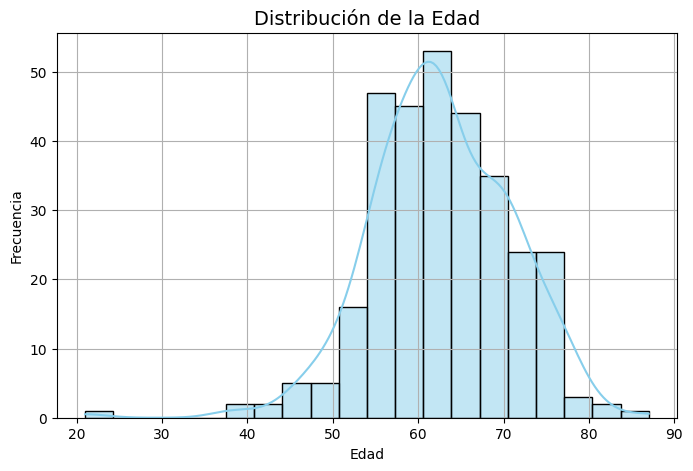


Análisis de forma de la variable 'AGE':
Media: 62.67, Mediana: 62.00
La distribución es asimétrica negativa (cola larga hacia la izquierda).
   Esto significa que la mayoría de los pacientes tienen edades altas,
   pero existen algunos valores bajos (personas jóvenes) que alargan la cola hacia la izquierda.


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcular medias y medianas de las columnas numéricas
medias = df.mean(numeric_only=True)
medianas = df.median(numeric_only=True)

print("Medias:\n", medias)
print("\nMedianas:\n", medianas)

# Comparación visual de una variable
plt.figure(figsize=(8,5))
sns.histplot(df['AGE'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribución de la Edad', fontsize=14)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Análisis de la forma según la gráfica y los valores
print("\nAnálisis de forma de la variable 'AGE':")
print(f"Media: {medias['AGE']:.2f}, Mediana: {medianas['AGE']:.2f}")
print("La distribución es asimétrica negativa (cola larga hacia la izquierda).")
print("   Esto significa que la mayoría de los pacientes tienen edades altas,")
print("   pero existen algunos valores bajos (personas jóvenes) que alargan la cola hacia la izquierda.")



Ahora miremos si hay un desvalance

In [93]:
df['LUNG_CANCER'].value_counts() #Aqui se realiza el conteo
                                 #Clase Mayoritaria 270
                                 #Clase Minoritaria 152

,count
LUNG_CANCER,
1,270
0,39


In [94]:
conteo=df['LUNG_CANCER'].value_counts() #Efectivamente hay un desvalance
porcentaje = (conteo / conteo.sum()) * 100
print(porcentaje)

LUNG_CANCER
1    87.378641
0    12.621359
Name: count, dtype: float64


In [95]:
relacion=conteo.min()/conteo.max() #Dividir minoritaria entre la mayoritaria
print(relacion) #Como la relacion es de 0.14

0.14444444444444443


Antes de balancear vamos a aplicar train test, ya que sino se hace antes pueden quedar datos viejos en las pruebas

Particionar el dataset: dividir datos en train y test.

In [96]:
from sklearn.model_selection import train_test_split

# Variables predictoras
X = df[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'CHRONIC_DISEASE',
        'FATIGUE', 'WHEEZING', 'COUGHING', 'SHORTNESS_OF_BREATH',
        'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']]

# Variable objetivo
y = df['LUNG_CANCER']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% para test
    random_state=42,     # para reproducibilidad
    stratify=y           # mantiene proporción de clases
)

# Información sobre los conjuntos
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])

print("\nDistribución de clases en y_train:")
print(y_train.value_counts(normalize=True))

print("\nDistribución de clases en y_test:")
print(y_test.value_counts(normalize=True))



Tamaño del conjunto de entrenamiento: 247
Tamaño del conjunto de prueba: 62

Distribución de clases en y_train:
LUNG_CANCER
1    0.874494
0    0.125506
Name: proportion, dtype: float64

Distribución de clases en y_test:
LUNG_CANCER
1    0.870968
0    0.129032
Name: proportion, dtype: float64


Ahora vamos a balancear con la tecnica SMOOTH

In [97]:
from imblearn.over_sampling import SMOTE

# Crear el objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicarlo solo al conjunto de entrenamiento
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Tamaño del conjunto de entrenamiento antes del balanceo:", X_train.shape[0])
print("Tamaño del conjunto de entrenamiento después del balanceo:", X_train_bal.shape[0])

print("\nDistribución de clases antes del balanceo:")
print(y_train.value_counts())

print("\nDistribución de clases después del balanceo:")
print(y_train_bal.value_counts())


Tamaño del conjunto de entrenamiento antes del balanceo: 247
Tamaño del conjunto de entrenamiento después del balanceo: 432

Distribución de clases antes del balanceo:
LUNG_CANCER
1    216
0     31
Name: count, dtype: int64

Distribución de clases después del balanceo:
LUNG_CANCER
1    216
0    216
Name: count, dtype: int64


In [98]:
# ==================================================
# IMPLEMENTACIÓN Y ENTRENAMIENTO DE RANDOM FOREST
# ==================================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,      # Número de árboles en el bosque
    random_state=42,       # Para reproducibilidad
    max_depth=10,          # Profundidad máxima de los árboles
    min_samples_split=5    # Mínimo de muestras para dividir un nodo
)

# Entrenar el modelo con los datos balanceados
print("Entrenando el modelo Random Forest...")
rf_model.fit(X_train_bal, y_train_bal)
print("✓ Modelo entrenado exitosamente!\n")

# ==================================================
# HACER PREDICCIONES
# ==================================================

# Predicciones en el conjunto de entrenamiento
y_train_pred = rf_model.predict(X_train_bal)

# Predicciones en el conjunto de prueba
y_test_pred = rf_model.predict(X_test)

# ==================================================
# EVALUACIÓN DEL MODELO
# ==================================================

print("="*60)
print("EVALUACIÓN DEL MODELO - CONJUNTO DE ENTRENAMIENTO")
print("="*60)
train_accuracy = accuracy_score(y_train_bal, y_train_pred)
print(f"Accuracy (Exactitud): {train_accuracy:.4f} ({train_accuracy*100:.2f}%)\n")

print("Matriz de Confusión (Entrenamiento):")
cm_train = confusion_matrix(y_train_bal, y_train_pred)
print(cm_train)

print("\nReporte de Clasificación:")
print(classification_report(y_train_bal, y_train_pred, target_names=['NO Cancer', 'SÍ Cancer']))

print("\n" + "="*60)
print("EVALUACIÓN DEL MODELO - CONJUNTO DE PRUEBA (TEST)")
print("="*60)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy (Exactitud): {test_accuracy:.4f} ({test_accuracy*100:.2f}%)\n")

print("Matriz de Confusión (Prueba):")
cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_test_pred, target_names=['NO Cancer', 'SÍ Cancer']))

# ==================================================
# RESUMEN FINAL
# ==================================================

print("\n" + "="*60)
print("RESUMEN FINAL")
print("="*60)
print(f"Modelo: Random Forest Classifier")
print(f"Número de árboles: {rf_model.n_estimators}")
print(f"Accuracy en Entrenamiento: {train_accuracy*100:.2f}%")
print(f"Accuracy en Prueba: {test_accuracy*100:.2f}%")
print("="*60)

Entrenando el modelo Random Forest...
✓ Modelo entrenado exitosamente!

EVALUACIÓN DEL MODELO - CONJUNTO DE ENTRENAMIENTO
Accuracy (Exactitud): 0.9815 (98.15%)

Matriz de Confusión (Entrenamiento):
[[210   6]
 [  2 214]]

Reporte de Clasificación:
              precision    recall  f1-score   support

   NO Cancer       0.99      0.97      0.98       216
   SÍ Cancer       0.97      0.99      0.98       216

    accuracy                           0.98       432
   macro avg       0.98      0.98      0.98       432
weighted avg       0.98      0.98      0.98       432


EVALUACIÓN DEL MODELO - CONJUNTO DE PRUEBA (TEST)
Accuracy (Exactitud): 0.8548 (85.48%)

Matriz de Confusión (Prueba):
[[ 5  3]
 [ 6 48]]

Reporte de Clasificación:
              precision    recall  f1-score   support

   NO Cancer       0.45      0.62      0.53         8
   SÍ Cancer       0.94      0.89      0.91        54

    accuracy                           0.85        62
   macro avg       0.70      0.76      0.

AUC del modelo: 0.9236


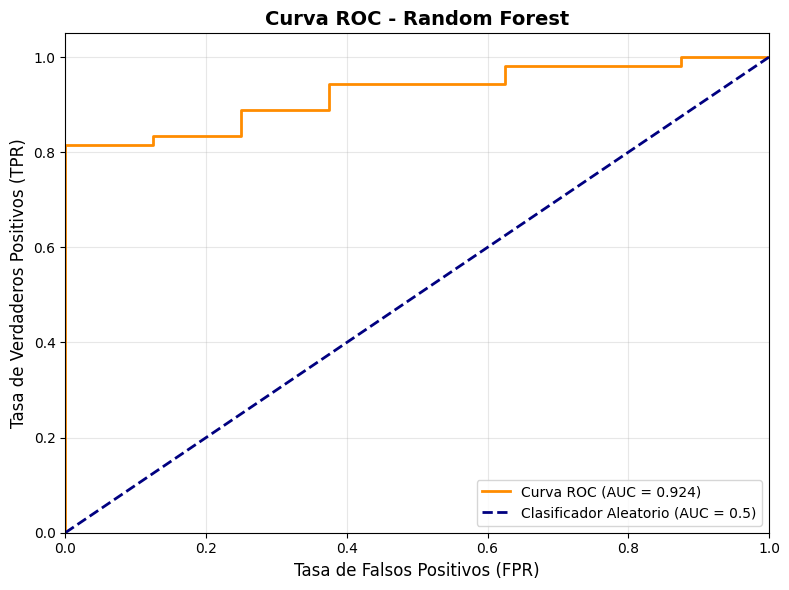

In [99]:
# ==================================================
# CURVA ROC Y AUC
# ==================================================

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener probabilidades para la curva ROC
y_test_proba = rf_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

print(f"AUC del modelo: {roc_auc:.4f}")

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador Aleatorio (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC - Random Forest', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()